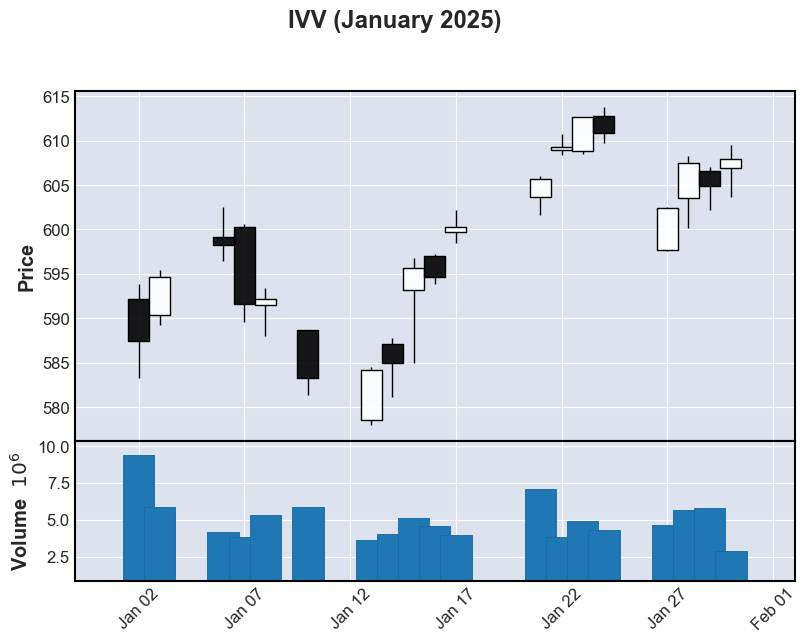

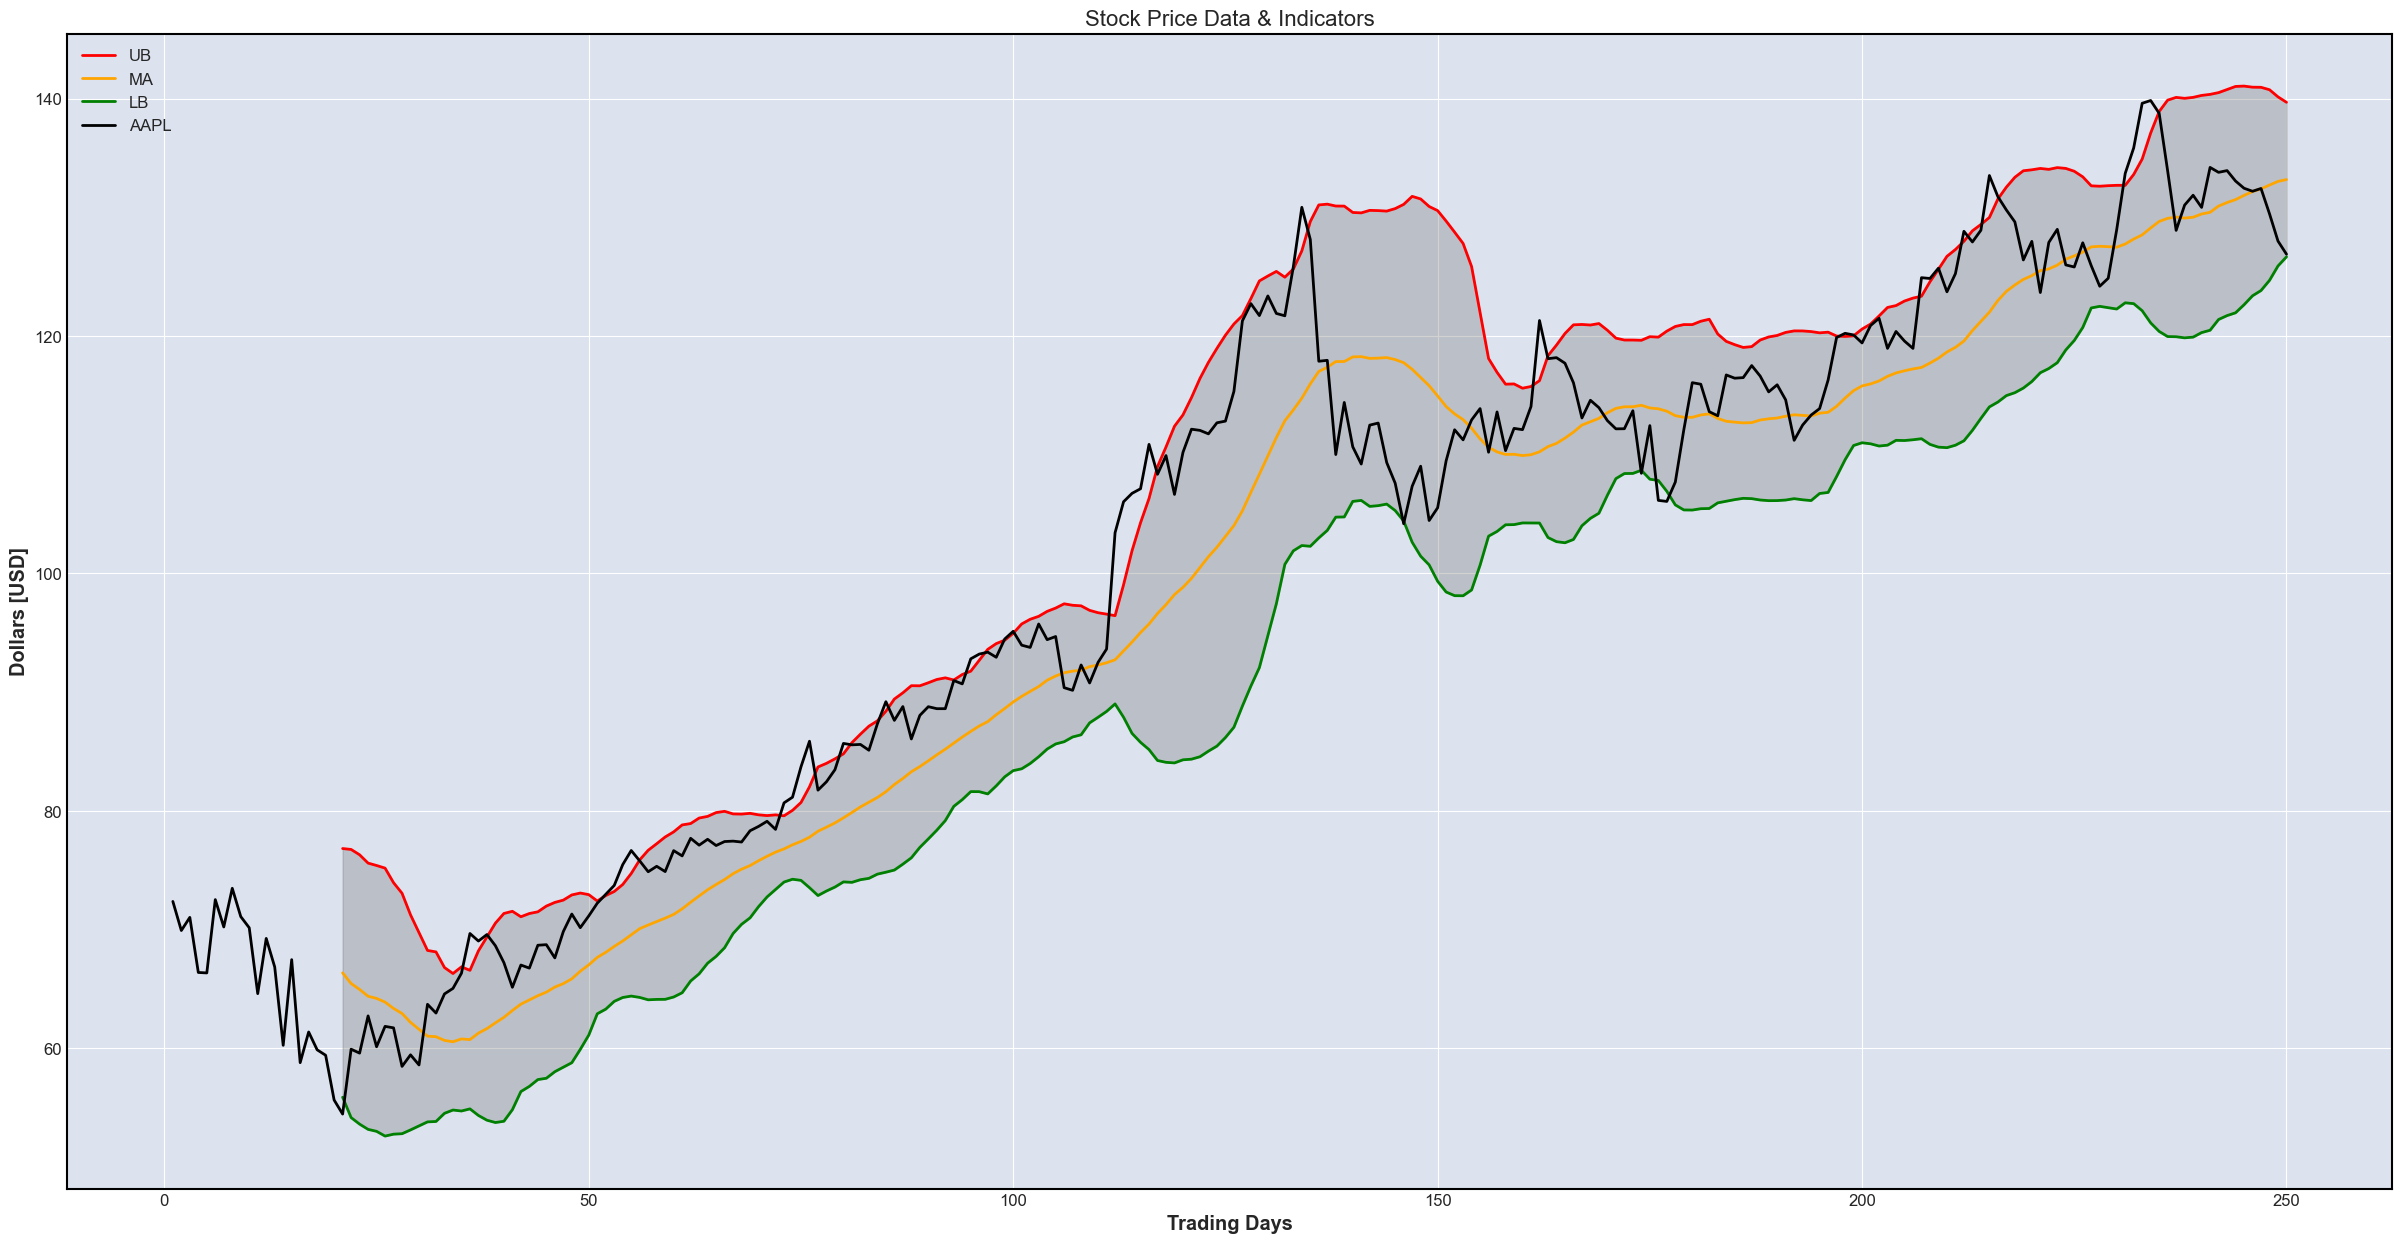

In [5]:
""""
Assignment 3: Stock Data Trends
Course: FINE3300 
Name: Jessica L. Draper
Date: 03/10/25

Purpose: Plot a candlestick graph to show stock data, and make a line graph for AAPL data all to identify possible trading signs

"""
# importing required libraries
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

##### PART A: Creating a candlestick / bar graph from IVV stock data #####

# determine what ticker symbol, define it
ivv_ticker = yf.Ticker("IVV")

# select the data from specifically Jan 1st 2025 to Jan 31st 2025
ivv_data = ivv_ticker.history(period="1mo", start="2025-01-01", end="2025-01-31")

# select the 5 relevant columns
ivv_data = ivv_data[["Open", "High", "Low", "Close", "Volume"]]

# determine the first five rows
ivv_data.head() # use print() to view

# plot the stock price changes on a candle graph, to match the one in the example figure
mpf.plot(ivv_data, type='candle', volume=True, show_nontrading=True, title='IVV (January 2025)', figsize=(10,7))


##### PART B: Graph stock price and bollinger bands #####

# incorporate the relevant data provided in the Excel file: StockData.csv
Stock_Data = pd.read_csv("StockData.csv")

# filter out unnecessary columns, only keep what is important to graph
Stock_Data_AAPL = Stock_Data.filter(items=['Trading Day', 'AAPL'])

# first 5 rows
Stock_Data_AAPL.head(5)

# function to calculate the moving average and standard deviation, to calculate Bollinger bands
def calculate_bollinger_bands(data, window=20):
    moving_avg = []
    std_dev = []
    
    for i in range(len(data)):
        if i < window:
            moving_avg.append(None)
            std_dev.append(None)
        else:
            avg = data[i-window:i].mean()
            std = data[i-window:i].std(ddof=0)
            moving_avg.append(avg)
            std_dev.append(std)
    
    return moving_avg, std_dev # list of moving averages and standard deviations

# apply the calculation for moving averages and standard deviations
moving_avg, std_dev = calculate_bollinger_bands(Stock_Data_AAPL['AAPL'])

# put all the results into storage
Stock_Data_AAPL['Moving Average'] = moving_avg
Stock_Data_AAPL['Standard Deviation'] = std_dev

# upper and lower Bollinger Bands
Stock_Data_AAPL['Upper Band'] = Stock_Data_AAPL['Moving Average'] + (2 * Stock_Data_AAPL['Standard Deviation'])
Stock_Data_AAPL['Lower Band'] = Stock_Data_AAPL['Moving Average'] - (2 * Stock_Data_AAPL['Standard Deviation'])

# display what was just adjusted and to double check our work (if needed)
Stock_Data_AAPL.head(21)

#store the first 250 rows of the above dataframe in a new dataframe (first 250 trading days for AAPL)
Stock_Data_AAPL_250 = Stock_Data_AAPL.iloc[:250].copy()

# formatting for the graph
plt.figure(figsize=(30, 15))

# more formatting
plt.plot(Stock_Data_AAPL_250['Trading Day'], Stock_Data_AAPL_250['Upper Band'], 'red', label='UB')
plt.plot(Stock_Data_AAPL_250['Trading Day'], Stock_Data_AAPL_250['Moving Average'], 'orange', label='MA')
plt.plot(Stock_Data_AAPL_250['Trading Day'], Stock_Data_AAPL_250['Lower Band'], 'green', label='LB')
plt.plot(Stock_Data_AAPL_250['Trading Day'], Stock_Data_AAPL_250['AAPL'], 'black', label='AAPL')

# shading
plt.fill_between(
    Stock_Data_AAPL_250['Trading Day'],
    Stock_Data_AAPL_250['Lower Band'],
    Stock_Data_AAPL_250['Upper Band'],
    color="grey", alpha=0.35
)

# labels for x and y axis
plt.title('Stock Price Data & Indicators', fontsize=16)
plt.xlabel("Trading Days")
plt.ylabel("Dollars [USD]")

# display the map successfully
plt.legend()
plt.show()
